# Navigating the Skies: A Comparative Analysis of Airline Performance Across Major U.S. Cities

Introduction
In our recent endeavor, we embarked on an analytical journey through a dataset sourced from GitHub. This dataset, rich in airline performance metrics across various cities, offered us a unique opportunity to delve deep into the operational intricacies of different airlines.

Project Details
Our primary objective was to meticulously clean and transform the data to enhance its accessibility and usability for in-depth analysis. By employing tools like Python and its powerful libraries, we effectively managed missing values, renamed columns for clarity, and reshaped the data to a more analysis-friendly structure.

With the data prepped and primed, we ventured into the analytical phase, crafting pivot tables and generating bar plots to visually dissect the performance disparities between airlines like Alaska and AMWEST. This not only shed light on their punctuality across cities like Los Angeles, Phoenix, and San Francisco but also highlighted their overall efficiency through aggregated performance metrics.

Each step, from data cleaning to detailed analysis, was aimed at extracting meaningful insights that could potentially inform operational strategies for these airlines, ultimately enhancing their on-time performance and service reliability.

In [76]:
#Reading the data from github after enlisting into a new database
import pandas as pd 
df=pd.read_csv("https://raw.githubusercontent.com/Vijayasuriya/M10-Data/main/M10_Data.csv")
df

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [78]:
#TASK1
df.dropna(how="all",inplace=True) #the null values and the rows consiting of the null values are removed
df.rename(columns={"Unnamed: 0":"airline","Unnamed: 1":"Status of airline"},inplace=True)
df.ffill(inplace=True) #the NaN is added for the same columns with the preceding rows 
df1=pd.melt(df,id_vars=['airline','Status of airline'],value_vars=['Los Angeles','Phoenix','San Diego','San Francisco','Seattle'])
df1 #the data is broken down and transformed to long data and is displayed after segregating into a seperate dataframe.

,airline,Status of airline,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AMWEST,on time,Los Angeles,694.0
3,AMWEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AMWEST,on time,Phoenix,4840.0
7,AMWEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


In [79]:
#the columns are re arranged and renamed as process of tidying  data present in the raw data repository 
#and consizing the data to a simplified way of representation
df1.rename(columns={"variable":"city","value":"value delay"},inplace=True)
df1

,airline,Status of airline,city,value delay
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AMWEST,on time,Los Angeles,694.0
3,AMWEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AMWEST,on time,Phoenix,4840.0
7,AMWEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


In [108]:
#TASK2
df2 =  df1.pivot_table('value delay', ['airline', 'city'], 'Status of airline') #new dataframe is created with conditions laid on old one
df2.reset_index(drop=False, inplace=True ) #the dataset condition is defined  
df2.reindex(['airline', 'city', 'on time', 'Delayed'], axis=1)  #the values are reindexed
df2['sum']=df2['delayed']+df2['on time'] #the data required and and after conditions are applied are added
df2['sum per']=df2['on time']/df2['sum'] #definition of the data
df2.pivot('city','airline','sum per') #display the result

airline,ALASKA,AMWEST
city,,
Los Angeles,0.889088,0.855734
Phoenix,0.948498,0.921028
San Diego,0.913793,0.854911
San Francisco,0.831405,0.712695
Seattle,0.857875,0.767176


<AxesSubplot:xlabel='city'>

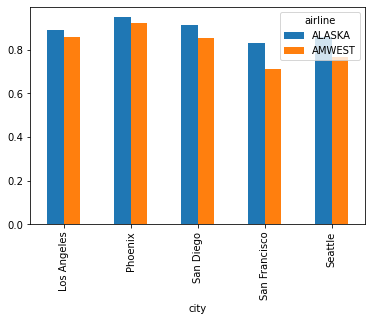

In [109]:
df2.pivot('city','airline','sum per').plot.bar() #representation in graph

Alaska has better on time performance as per each city

In [111]:
df3=df2[['airline','city','on time','sum']] #new way of evaluation is done in a new dataframe

In [116]:
df3.groupby('airline')['on time','sum'].mean() #conditions and evaluations are done within groupby statement

C:\Users\vijay\AppData\Local\Temp\ipykernel_23536\1924315111.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3.groupby('airline')['on time','sum'].mean()


Status of airline,on time,sum
airline,,
ALASKA,654.8,755.0
AMWEST,1287.6,1445.0


AMWEST has higher on time performance to Alska if we compute on overall performance

In [123]:
#TASK3
df1.pivot_table( index=["airline",'Status of airline'],columns=["city"],values="value delay") #the data obtained is represented in wider format and in a crisp way too

city                       Los Angeles  Phoenix  San Diego  San Francisco  \
airline Status of airline                                                   
ALASKA  delayed                   62.0     12.0       20.0          102.0   
        on time                  497.0    221.0      212.0          503.0   
AMWEST  delayed                  117.0    415.0       65.0          129.0   
        on time                  694.0   4840.0      383.0          320.0   

city                       Seattle  
airline Status of airline           
ALASKA  delayed              305.0  
        on time             1841.0  
AMWEST  delayed               61.0  
        on time              201.0

It is possible to mimic back to the data set provided